---
## **Test the standard SVM Classifier**
---

<font size="2">Eudald Sangenis  
Creation: 7/13/2022  
Last Update: 11/15/2024  

The objective of this file is to test the standard SVM classifier trained on the file using the test dataset:  
- 02_standard_SVM_train_cls.ipynb

The Confusion Matrices are saved at the CFM folder.
</font>

---
## **<font size="5">1. Libraries</font>**
---

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

---
## **<font size="5">2. Parameters to modify</font>**
---

<font size="2">Boolean variable:
* True: Predict the test datasets
* False: Import already a done prediction</font>

In [2]:
prediction = True

<font size="2">Path High Dimensional Datasets to test the classifier:</font>

In [ ]:
type_dataset = 'test'       # train, test
data_dataset = '2022_03_17' # 2022_03_17, 2022_07_27, 2022_08_01
bias_dataset = True         # True (no Bias), False (Bias).

In [4]:
# Get the current working directory
current_directory = os.getcwd()
# Folder to read the labeled and HD datasets:
dataset_path = current_directory+'\\datasets\\'+data_dataset+'\\'

<font size="2">Path to the High Dimensional Classifier:</font>

In [5]:
# Folder classifier:
folder_clf = current_directory+'\\clf\\'
# Classifier Name:
name_clf = '6sig_no_bias_balanced_clf.sav'

if prediction == True:
    support = pickle.load(open(folder_clf + name_clf, 'rb'))    # read clf model
    print('Classifier Loaded!')

Classifier Loaded!


<font size="2">Path to the predicted labels dataset:</font>

In [6]:
folder_label_predicted = current_directory+'\\clf\\'

match type_dataset:
    case 'test'      : l_predicted_name = data_dataset + '_Y_predicted_HD_test_df'
    case 'train'     : l_predicted_name = data_dataset + '_Y_predicted_HD_train_df'

<font size="2">Path to where to save the confusion matrix:</font>

In [7]:
folder_cfm = current_directory

---
## **<font size="5">3. Load Trained Model Dataset:</font>**
---

In [ ]:
type_dataset_model = 'train'      # train, test
data_dataset_1 = '2022_03_17'
data_dataset_2 = '2022_04_25'
data_dataset_3 = '2022_07_27'
data_dataset_4 = '2022_08_01'
num_df_used_to_train = 4

dataset_path_1 = current_directory+'\\datasets\\'+data_dataset_1+'\\'
dataset_path_2 = current_directory+'\\datasets\\'+data_dataset_2+'\\'
dataset_path_3 = current_directory+'\\datasets\\'+data_dataset_3+'\\'
dataset_path_4 = current_directory+'\\datasets\\'+data_dataset_4+'\\'
print('Reading datasets...')
# Load the HD dataset
if bias_dataset == False:
    if num_df_used_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'.csv')

    if num_df_used_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset_model+'.csv')
    
    if num_df_used_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset_model+'.csv')
        df_4 = pd.read_csv(dataset_path_4 + '6sig_'+type_dataset_model+'.csv')

if bias_dataset == True:
    if num_df_used_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'_no_Bias.csv')

    if num_df_used_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset_model+'_no_Bias.csv')
    
    if num_df_used_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset_model+'_no_Bias.csv')
        df_4 = pd.read_csv(dataset_path_4 + '6sig_'+type_dataset_model+'_no_Bias.csv')

print('Reading done!')

if 'Unnamed: 0' in df_1: df_1 = df_1.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0' in df_2: df_2 = df_2.drop(['Unnamed: 0'], axis=1)
if num_df_used_to_train == 3: 
    if 'Unnamed: 0' in df_3: df_3 = df_3.drop(['Unnamed: 0'], axis=1)
if num_df_used_to_train == 4: 
    if 'Unnamed: 0' in df_3: df_3 = df_3.drop(['Unnamed: 0'], axis=1)
    if 'Unnamed: 0' in df_4: df_4 = df_4.drop(['Unnamed: 0'], axis=1)
if num_df_used_to_train == 2: df = pd.concat([df_1, df_2], axis=0)
if num_df_used_to_train == 3: df = pd.concat([df_1, df_2, df_3], axis=0)
if num_df_used_to_train == 4: df = pd.concat([df_1, df_2, df_3, df_4], axis=0)
df = df.reset_index().drop('index', axis=1)
del df_1, df_2
if num_df_used_to_train == 3: del df_3
if num_df_used_to_train == 4: del df_3, df_4

print('Shape concat dfs: ')
print(df.shape)
df

Reading datasets...
Reading done!
Shape concat dfs: 
(1258319, 7)


,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,-0.000185,-0.000006,-0.001230,0.001092,-0.000120,0.000005,ZUPT
1,0.000679,-0.000392,-0.000402,0.000803,0.000307,0.000113,ZUPT
2,-0.000223,-0.000151,-0.000217,0.000137,0.000536,0.000121,ZUPT
3,-0.000659,-0.000893,0.000353,-0.000083,0.000386,-0.000252,ZUPT
4,-0.000044,-0.001524,0.000693,-0.000007,-0.000333,-0.000293,ZUPT
...,...,...,...,...,...,...,...
1258314,-0.009891,0.022864,-0.000014,0.003930,-0.001750,-0.001023,ZUPT
1258315,-0.009162,0.026353,-0.002528,0.003737,-0.003283,-0.002351,ZUPT
1258316,-0.008378,0.024085,-0.005930,0.004541,-0.004459,-0.003415,ZUPT
1258317,-0.015185,0.024992,-0.002349,0.004476,-0.003342,-0.002566,ZUPT


In [9]:
X_model = df.iloc[:,:-1]
del df                      # delete variable to reduce memory
X_model.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,-0.000185,-0.000006,-0.001230,0.001092,-0.000120,0.000005
1,0.000679,-0.000392,-0.000402,0.000803,0.000307,0.000113


---
## **<font size="5">4. Load Test Dataset:</font>**
---

In [10]:
print('Reading dataset ' + data_dataset + ' ...')
# Load the HD dataset
if bias_dataset == False: df = pd.read_csv(dataset_path + '6sig_'+type_dataset+'.csv')
if bias_dataset == True: df = pd.read_csv(dataset_path + '6sig_'+type_dataset+'_no_Bias.csv')
print('Reading done!')

if 'Unnamed: 0' in df: df = df.drop(['Unnamed: 0'], axis=1)

print('Shapes '+data_dataset+': ')
print(df.shape)

Reading dataset 2022_03_17 ...
Reading done!
Shapes 2022_03_17: 
(309981, 7)


In [11]:
print('Test dataset:')
df.head(2)

Test dataset:


,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.001399,-0.000034,-0.001299,-0.005591,-0.000641,0.001256,ZUPT
1,0.002365,-0.001068,-0.002053,-0.006020,-0.001441,0.000759,ZUPT


In [12]:
X = df.iloc[:, :-1]
Y = df['label']

In [13]:
Y = Y.replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
               'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
               'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
               'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
               'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]).to_numpy()

---
## **<font size="5">5. Normalize data:</font>**
---

In [14]:
## STANDARIZE DATA
scaler_train = StandardScaler()
scaler_train.fit(X_model)           # fit with dataset that was used to train the model
del X_model                         # delete variable to reduce memory
X_norm = scaler_train.transform(X)  # transform the new datset
X_norm = pd.DataFrame(X_norm)
X_norm.head(2)

,0,1,2,3,4,5
0,0.170726,0.043703,0.130736,0.003293,0.010383,0.044069
1,0.171446,0.042722,0.130103,0.003036,0.010129,0.043692


In [15]:
X_norm['label'] = Y
print('The projected test data in the number of components is:')
X_norm

The projected test data in the number of components is:


,0,1,2,3,4,5,label
0,0.170726,0.043703,0.130736,0.003293,0.010383,0.044069,0
1,0.171446,0.042722,0.130103,0.003036,0.010129,0.043692,0
2,0.171351,0.042960,0.130606,0.003238,0.010087,0.043373,0
3,0.171330,0.043163,0.131061,0.003701,0.010179,0.043040,0
4,0.171872,0.044898,0.131409,0.004064,0.010445,0.042912,0
...,...,...,...,...,...,...,...
309976,0.165379,0.078994,0.126571,0.009586,0.010495,0.040987,0
309977,0.165072,0.078832,0.126370,0.009521,0.010591,0.041117,0
309978,0.165080,0.079525,0.127468,0.009389,0.010629,0.041380,0
309979,0.164968,0.081096,0.127467,0.009628,0.010540,0.041694,0


---
## **<font size="5">6. Prediction Model</font>**
---

In [16]:
X = X_norm.iloc[:,:-1]

In [17]:
Y = X_norm.iloc[:,-1]

In [18]:
if prediction == True:
    print('Predicting...')
    Y_predicted = support.predict(X)
    print('Prediction done!')
    Y_predicted_df = pd.DataFrame(Y_predicted, columns = ['predicted_l'])
    Y_predicted_df.to_csv(folder_label_predicted + l_predicted_name)
    Y_predicted = pd.read_csv(folder_label_predicted + l_predicted_name)
else:
    Y_predicted = pd.read_csv(folder_label_predicted + l_predicted_name)
    print('L Predicted Loaded!')

Predicting...


c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction done!


---
## **<font size="5">7. Prediction Results</font>**
---

---
### **<font size="3">7.0. Info</font>**
---

In [19]:
Y_predicted = Y_predicted.drop(columns=['Unnamed: 0'])
Y_predicted = np.transpose(Y_predicted.to_numpy().flatten())
print(Y), print(Y_predicted)
print(len(Y)), print(len(Y_predicted))
print(np.isnan(np.sum(Y))), print(np.isnan(np.sum(Y_predicted)))
print(np.where(np.isnan(Y)))
print(type(Y)), print(type(Y_predicted))

0         0
1         0
2         0
3         0
4         0
         ..
309976    0
309977    0
309978    0
309979    0
309980    0
Name: label, Length: 309981, dtype: int64
[0 0 0 ... 0 0 0]
309981
309981
False
False
(array([], dtype=int64),)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(None, None)

---
### **<font size="3">7.1. Accuracy</font>**
---

In [20]:
r2score_svm = 100*r2_score(Y, Y_predicted)
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm = 100*accuracy_score(Y, Y_predicted)
print('The accuracy of the SVM is: {} %'.format(acc_svm))

The r2score of the SVM is: 81.61454177002281 %
The accuracy of the SVM is: 74.61683135417977 %


---
### **<font size="3">7.2. Location of support vectors</font>**
---

In [21]:
print('Location of the support vectors: ')
print(pd.DataFrame(support.support_vectors_))

Location of the support vectors: 
               0         1         2         3         4         5
0       0.171611  0.053662  0.127302  0.005569  0.011644  0.044120
1       0.163355  0.057747  0.126430  0.006913  0.011028  0.040815
2       0.155788  0.069594  0.129515  0.006855  0.012721  0.042299
3       0.171448  0.034982  0.131343  0.004440  0.010216  0.042409
4       0.164220  0.054518  0.124614  0.006408  0.011124  0.041643
...          ...       ...       ...       ...       ...       ...
134626  0.581888  2.407613  0.979379 -6.219312  0.975634  2.910583
134627  0.130789  0.054517  0.096819  0.140850 -0.064406 -0.051077
134628  0.154448  0.060705  0.144744  0.040358 -0.102895  0.059146
134629  0.192003  0.586262 -0.061536  0.785099 -0.028833 -0.250441
134630 -1.474305 -6.571561  0.061126 -0.055829 -1.763558  5.379500

[134631 rows x 6 columns]


---
### **<font size="3">7.3. Number of support vectors for each class</font>**
---

In [22]:
print('Number of support vectors for each class:')
print(support.n_support_)

Number of support vectors for each class:
[9018 9646 9649 8410 8158 6145 9274 8717 9420 7894 6063 5543 5491 5721
 5457 6585 6389 3840 3211]


---
### **<font size="3">7.4. Check if it is well balanced (sum has to be 0)</font>**
---

In [23]:
print('SUM of the support vectors:')
print(support.dual_coef_.sum())

SUM of the support vectors:
-1.493026502430439e-08


---
### **<font size="3">7.5. Classification report</font>**
---

In [24]:
print(classification_report(Y, Y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95942
           1       0.65      0.64      0.65     18084
           2       0.47      0.47      0.47     10346
           3       0.15      0.53      0.23      4295
           4       0.30      0.68      0.42      2312
           5       0.26      0.57      0.36       932
           6       0.69      0.58      0.63     11032
           7       0.37      0.63      0.47      3763
           8       0.39      0.42      0.40      4622
           9       0.45      0.77      0.57      3013
          10       0.83      0.68      0.74     26685
          11       0.76      0.59      0.67     17852
          12       0.64      0.64      0.64     15039
          13       0.61      0.64      0.62     12020
          14       0.81      0.60      0.69      9073
          15       0.79      0.64      0.71     24526
          16       0.64      0.59      0.62     17606
          17       0.92    

---
### **<font size="3">7.6. Confusion matrix</font>**
---

In [25]:
X_test = pd.concat([pd.DataFrame(X_norm.iloc[:,:-1]), pd.DataFrame(Y), pd.DataFrame(Y_predicted)], axis = 1)

X_test.columns = ['acc1','acc2','acc3','gyro1','gyro2','gyro3','true_l','predicted_l']

print('X test with true and predicted label:')
X_test

X test with true and predicted label:


,acc1,acc2,acc3,gyro1,gyro2,gyro3,true_l,predicted_l
0,0.170726,0.043703,0.130736,0.003293,0.010383,0.044069,0,0
1,0.171446,0.042722,0.130103,0.003036,0.010129,0.043692,0,0
2,0.171351,0.042960,0.130606,0.003238,0.010087,0.043373,0,0
3,0.171330,0.043163,0.131061,0.003701,0.010179,0.043040,0,0
4,0.171872,0.044898,0.131409,0.004064,0.010445,0.042912,0,0
...,...,...,...,...,...,...,...,...
309976,0.165379,0.078994,0.126571,0.009586,0.010495,0.040987,0,0
309977,0.165072,0.078832,0.126370,0.009521,0.010591,0.041117,0,0
309978,0.165080,0.079525,0.127468,0.009389,0.010629,0.041380,0,0
309979,0.164968,0.081096,0.127467,0.009628,0.010540,0.041694,0,0


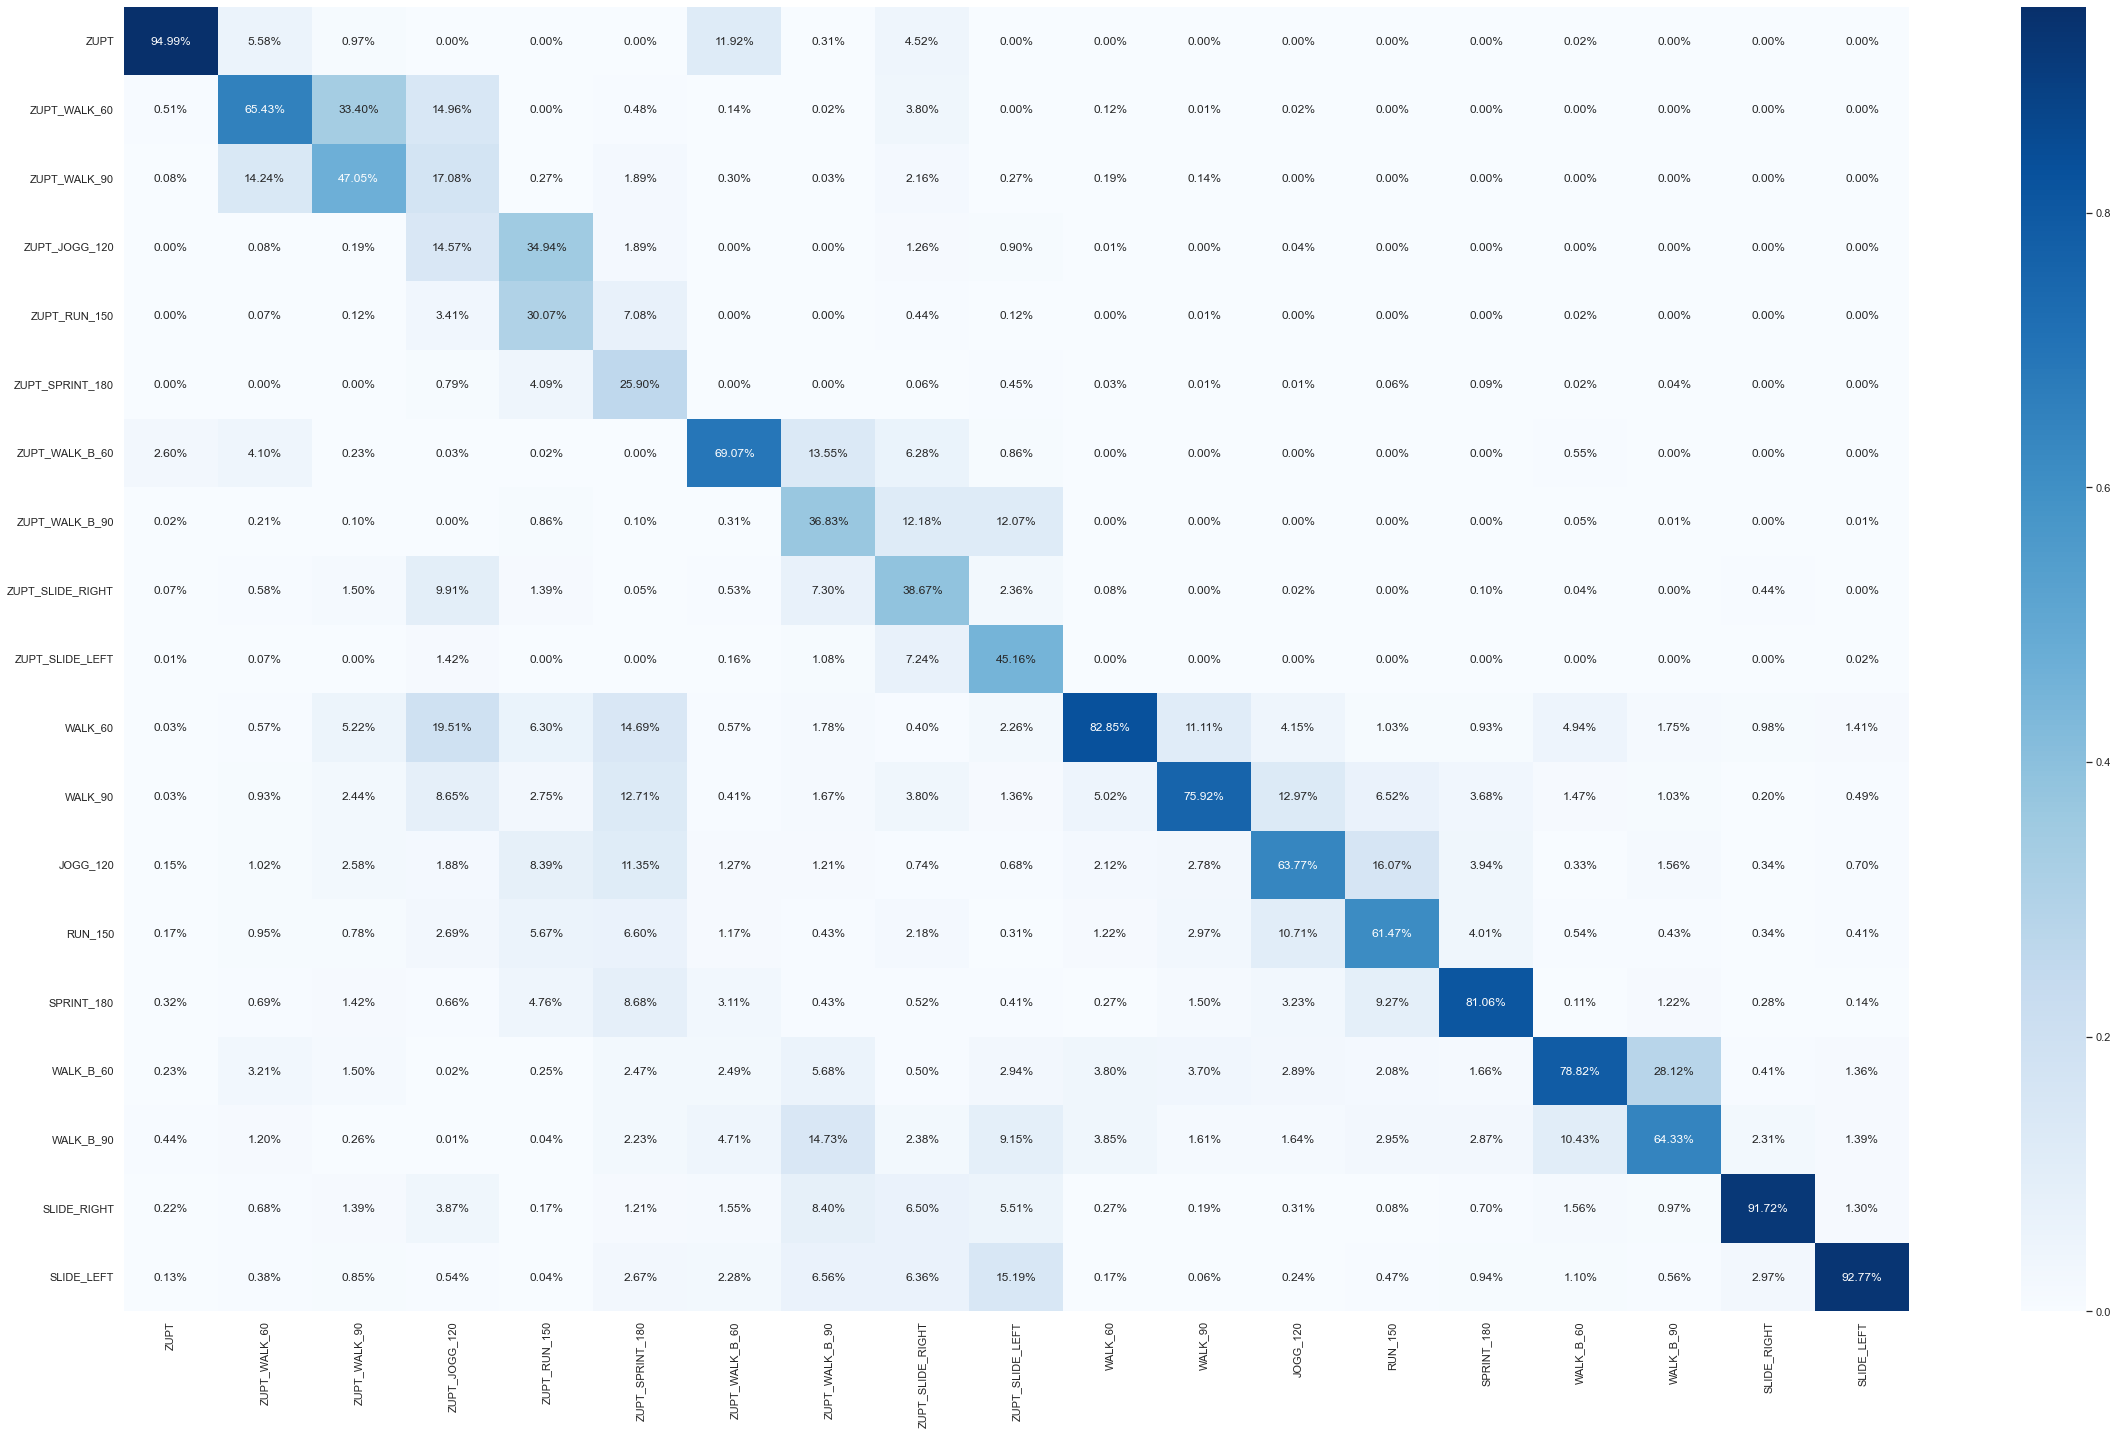

In [35]:
X_test.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels = ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
          'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
          'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
          'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
          'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']

CM_SVM = confusion_matrix(X_test.loc[:,"true_l"], X_test.loc[:,"predicted_l"], labels=labels)

CM_SVM = pd.DataFrame(CM_SVM, index=labels)

sns.set(rc = {'figure.figsize':(40,24)})
axis_labels = ['ZUPT','ZUPT_WALK_60','ZUPT_WALK_90','ZUPT_JOGG_120','ZUPT_RUN_150','ZUPT_SPRINT_180',
               'ZUPT_WALK_B_60','ZUPT_WALK_B_90','ZUPT_SLIDE_RIGHT','ZUPT_SLIDE_LEFT',
               'WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180','WALK_B_60',
               'WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']

sns.heatmap(CM_SVM/np.sum(CM_SVM), annot=True, fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm, 2))+'acc_6sig.png') 
plt.show()

---
## **<font size="5">8. Prediction Results Just Activity Classes:</font>**
---

In [27]:
X_test_act = pd.DataFrame()

X_test_act.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
     [0,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9])

X_test_act.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
     [0,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9])

---
### **<font size="3">8.1. Accuracy</font>**
---

In [28]:
r2score_svm = 100*r2_score(X_test_act["true_l"], X_test_act["predicted_l"])
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm_1 = 100*accuracy_score(X_test_act["true_l"], X_test_act["predicted_l"])
print('The accuracy of the SVM is: {} %'.format(acc_svm_1))

The r2score of the SVM is: 76.33313641970292 %
The accuracy of the SVM is: 75.7914194740968 %


---
### **<font size="3">8.2. Classification report</font>**
---

In [29]:
print(classification_report(X_test_act["true_l"], X_test_act["predicted_l"]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95942
           1       0.75      0.66      0.71     44769
           2       0.65      0.56      0.60     28198
           3       0.40      0.63      0.49     19334
           4       0.54      0.66      0.59     14332
           5       0.70      0.61      0.65     10005
           6       0.77      0.63      0.69     35558
           7       0.61      0.64      0.62     21369
           8       0.80      0.73      0.76     20721
           9       0.84      0.85      0.85     19753

    accuracy                           0.76    309981
   macro avg       0.70      0.70      0.69    309981
weighted avg       0.77      0.76      0.76    309981



---
### **<font size="3">8.3. Confusion matrix</font>**
---

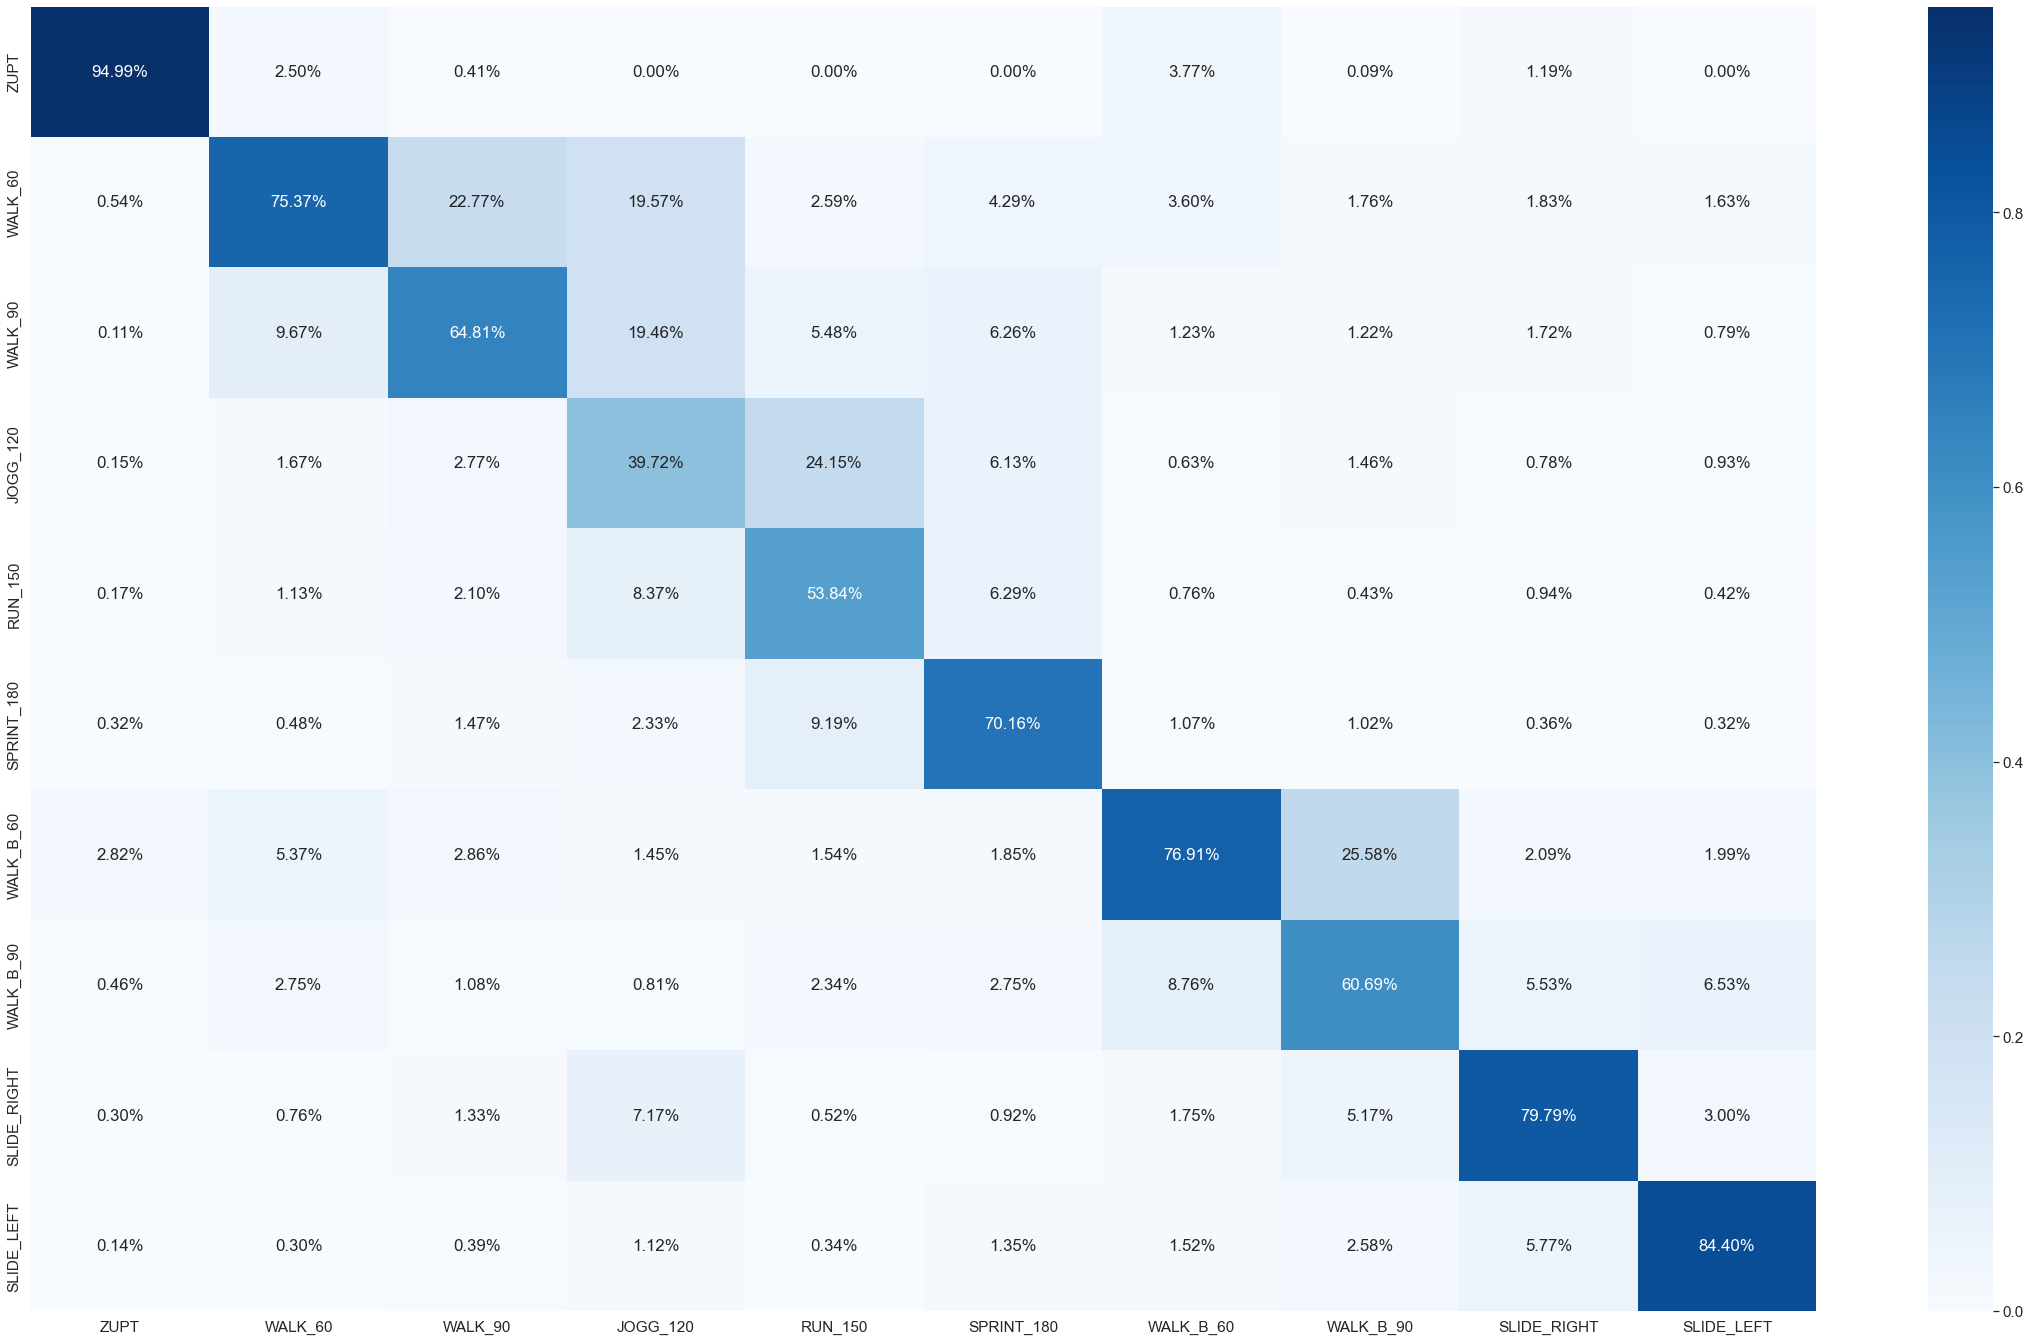

In [30]:
X_test_act.loc[:,"true_l"] = X_test_act.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9],
    ['ZUPT','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act.loc[:,"predicted_l"] = X_test_act.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9],
    ['ZUPT','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels_act = ['ZUPT','walk_60','walk_90','jogg_120','run_150',
              'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']


CM_SVM = confusion_matrix(X_test_act.loc[:,"true_l"], X_test_act.loc[:,"predicted_l"], labels=labels_act)

CM_SVM = pd.DataFrame(CM_SVM, index=labels_act)

sns.set(rc = {'figure.figsize':(40,24)})
axis_labels = ['ZUPT','WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180',
               'WALK_B_60','WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']
               
sns.set(font_scale=1.4)
sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm_1, 2))+'acc_6sig_v2.png') 
plt.show()

---
## **<font size="5">9. Prediction Results Just Activity Classes unifying walk 60 & 90 and walk back:</font>**
---

In [31]:
X_test_act2 = pd.DataFrame()

X_test_act2.loc[:,"true_l"] = X_test_act.loc[:,"true_l"].replace(
    ['ZUPT','walk_60','walk_90','jogg_120','run_150','sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
    [0,1,1,2,3,4,5,5,6,6])

X_test_act2.loc[:,"predicted_l"] = X_test_act.loc[:,"predicted_l"].replace(
    ['ZUPT','walk_60','walk_90','jogg_120','run_150','sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
    [0,1,1,2,3,4,5,5,6,6])

X_test_act2

,true_l,predicted_l
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
309976,0,0
309977,0,0
309978,0,0
309979,0,0


In [32]:
r2score_svm = 100*r2_score(X_test_act2["true_l"], X_test_act2["predicted_l"])
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm_2 = 100*accuracy_score(X_test_act2["true_l"], X_test_act2["predicted_l"])
print('The accuracy of the SVM is: {} %'.format(acc_svm_2))

The r2score of the SVM is: 74.73292046707138 %
The accuracy of the SVM is: 82.04115736125762 %


In [33]:
print(classification_report(X_test_act2["true_l"], X_test_act2["predicted_l"]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95942
           1       0.86      0.75      0.80     72967
           2       0.40      0.63      0.49     19334
           3       0.54      0.66      0.59     14332
           4       0.70      0.61      0.65     10005
           5       0.86      0.78      0.82     56927
           6       0.87      0.83      0.85     40474

    accuracy                           0.82    309981
   macro avg       0.74      0.75      0.74    309981
weighted avg       0.84      0.82      0.83    309981



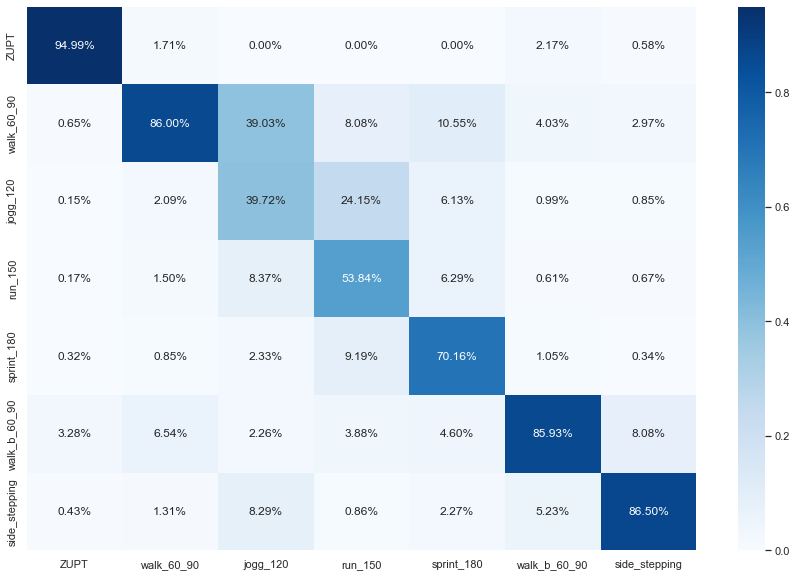

In [34]:
X_test_act2.loc[:,"true_l"] = X_test_act2.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6],
    ['ZUPT','walk_60_90','jogg_120','run_150',
     'sprint_180','walk_b_60_90','side_stepping'])

X_test_act2.loc[:,"predicted_l"] = X_test_act2.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6],
    ['ZUPT','walk_60_90','jogg_120','run_150',
     'sprint_180','walk_b_60_90','side_stepping'])

labels_act = ['ZUPT','walk_60_90','jogg_120','run_150',
              'sprint_180','walk_b_60_90','side_stepping']


CM_SVM = confusion_matrix(X_test_act2.loc[:,"true_l"], X_test_act2.loc[:,"predicted_l"], labels=labels_act)

CM_SVM = pd.DataFrame(CM_SVM, index=labels_act)

sns.set(rc = {'figure.figsize':(15,10)})
axis_labels = ['ZUPT','walk_60_90','jogg_120','run_150',
               'sprint_180','walk_b_60_90','side_stepping']

sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.savefig(folder_cfm + 'cfm_'+data_dataset+'_'+str(round(acc_svm_2, 2))+'acc_6sig_3.png') 
plt.show()